<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/GymFrozenLakeQLearning.ipynb" target="_parent">Ouvrir sous colab</a>


# Machine Learning

## Appliqué à [Gym.OpenAI](https://gym.openai.com)


---

## Test de ML par Q-Learning pour atteindre l'objectif

**Utilisation de l'environnement Gym**
(voir la page d'introduction à [Gym](https://gym.openai.com)).


#### Si besoin, importer gym
### Paramètres

Pour rappel l'algo de Q Learning simple repose sur cette équation :
$Q(s,a) \gets \lambda \times (r + \gamma \times max_{a'}(Q(s', a'))) + (1-\lambda ) \times Q(s,a)$ avec

- $\lambda$ : coef d'apprentissage
- $\gamma$ : coef de réduction
- $r$ : récompense

Cette équation donne la qualité de l'action _a_ à partir de l'état _s_.

Initialement, les actions sont choisies aléatoirement et notées; puis au fil des tests les actions les plus valuées sont choisies. Pour cela, un tirage est effectuée, s'il est inférieur à un $\epsilon$, le choix est aléatoire. Cet $\epsilon$ décroit au fil des tests.


In [28]:
# !pip install gymnasium

In [127]:
import gymnasium as gym
import numpy as np
import random as rnd
from tqdm import tqdm

## Affichage de du résultat

Affichons maintenant la liste des actions via l'environnement Gym


In [43]:
def rendu(solutions_list):
    """ affiche la plus courte sequence d'actions permettant d'atteindre l'objectif q partir des solutions fournies
    Parameters
    ----------
    solutions_list : liste des solutions trouvees

    Returns
    -------
    None.
    """
    mini_sol = solutions_list[0]
    mini_actions = mini_sol[2]
    for s in  solutions_list:
        if len(s[2]) < len(mini_sol[2]): 
            mini_sol = s
            mini_actions = s[3]
    print("une solution en ", len(mini_sol[2]), " etapes : ")
    env.reset()
    print(env.render())
    for a in mini_actions:
        env.step(a)
        print(env.render())


In [118]:
##ON LANCE LA RESOLUTION : 
solutions = try_qlearn(3000, 50)
if(len(solutions)>0):rendu(solutions)
#relancer le bloc si pas de solution trouvee

100%|██████████| 3000/3000 [00:02<00:00, 1030.84it/s]

une solution en  14  etapes : 

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFH

In [119]:
import matplotlib.pyplot as plt

In [120]:

def plot_frequence_sol(solutions_list):
    """
    dessine la frequence de solution trouvees
    Parameters
    ----------
    solutions : liste des solutions

    Returns
    -------
    None.

    """
    xs = [x[0] for x in solutions_list]
    ys = [y[1] for y in solutions_list]
    plt.figure(figsize=(10, 4))
    plt.plot(xs, ys, '.')
    plt.xlabel("no du test")
    plt.ylabel("gain")    
    plt.title("Fréquence d'apparition de solution")
    plt.show()



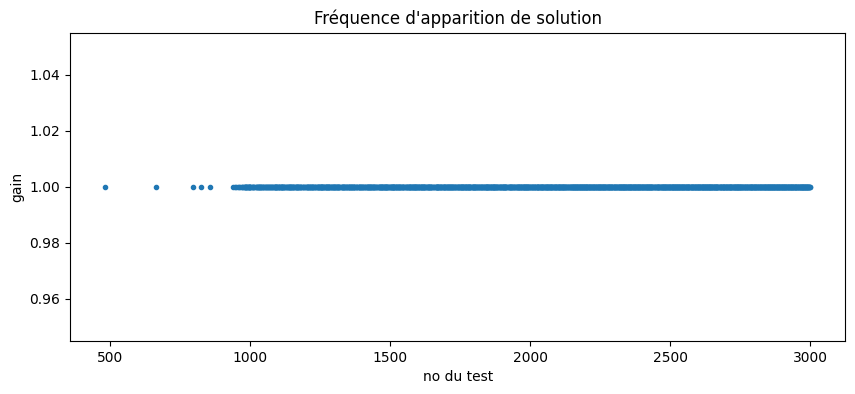

In [121]:
plot_frequence_sol(solutions)

In [47]:
def showBestValues(Q):
    #bestQValues contient les meilleures valeurs des actions possibles pour chaque état
    #et on "ecrase" les valeurs pour réduire leurs différences (utile pour le choix des couleurs)
    bestQValues = [max(ligne)**(1/10) for ligne in Q]
    dim = int(Q.shape[0]**(1/2))
    #on transforme bestQValues en matrice dim x dim
    bestQValues = np.reshape(bestQValues, (dim,dim))
    #on demande à python de générer une "heatmap" 
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(bestQValues,cmap='Blues')
    plt.title("Meilleur score d'une action selon l'état")
    plt.show()


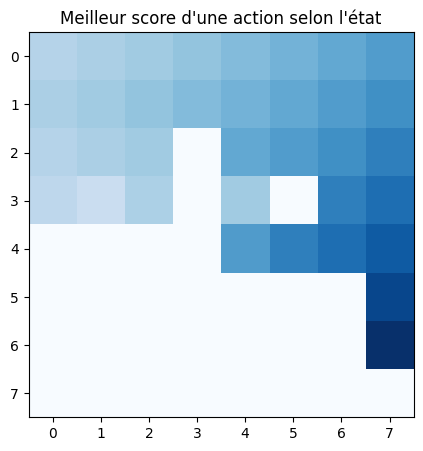

In [122]:
showBestValues(Q)

In [49]:
# pip install seaborn

In [50]:
import seaborn as sns

In [51]:
# Author: Andrea Pierré
# License: MIT License
def qtable_directions_map(qtable, dim):
    """Get the best learned action & map it to arrows."""
    qtable_val_max = qtable.max(axis=1).reshape(dim, dim)
    qtable_best_action = np.argmax(qtable, axis=1).reshape(dim, dim)
    qtable_directions = np.empty(qtable_best_action.flatten().shape, dtype=str)
    eps = 0#np.finfo(float).min #np.finfo(float).eps  # Minimum float number on the machine
    for idx, val in enumerate(qtable_best_action.flatten()):
        if qtable_val_max.flatten()[idx] > eps:
            # Assign an arrow only if a Q-value has been learned as best action
            # otherwise since 0 is a direction, it also gets mapped on the tiles where
            # it didn't actually learn anything
            qtable_directions[idx] = directions[val]
    qtable_directions = qtable_directions.reshape(dim, dim)
    return qtable_val_max, qtable_directions

In [52]:
# from Author: Andrea Pierré
# License: MIT License
from math import sqrt
sqrt_vect = np.vectorize(sqrt)

def plot_q_values_map(qtable, dim):
    """Plot the last frame of the simulation and the policy learned."""
    qtable_val_max, qtable_directions = qtable_directions_map(qtable, dim)
    # Plot the last frame
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    # Plot the policy
    sns.heatmap(
        sqrt_vect(sqrt_vect(sqrt_vect(qtable_val_max))),
        annot=qtable_directions,
        fmt="",
        cmap=sns.color_palette("Blues", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
        xticklabels=[],
        yticklabels=[],
        annot_kws={"fontsize": "xx-large"},
        ).set(title="Learned Q-values\nArrows represent best action")
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.7)
        spine.set_color("black")
    plt.show()

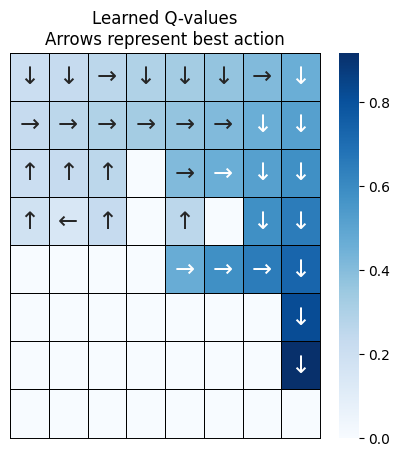

In [123]:
plot_q_values_map(Q,8)

---

### <font color="red">Test de résolution en mode non déterministe</font>

Rechargeons l'environnement en mode "glissant".

Il suffit de réinitialiser la table Q et de lancer l'algorithme...


100%|██████████| 10000/10000 [00:17<00:00, 578.70it/s]


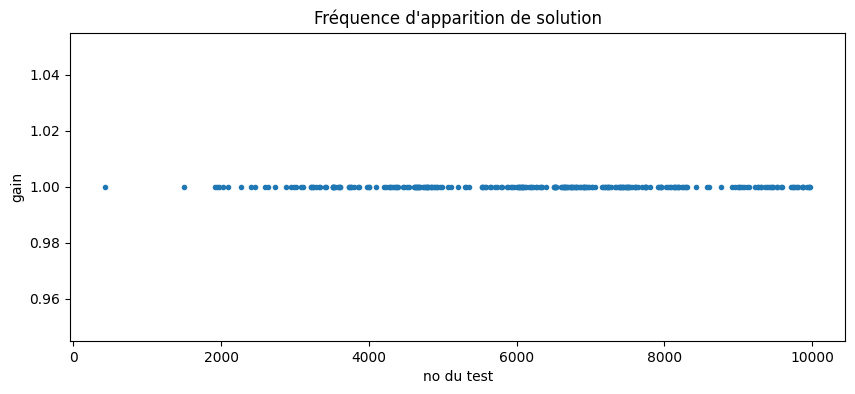

In [112]:
env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True, render_mode='ansi') 

env.reset()
Q = np.zeros([env.observation_space.n,env.action_space.n])
lambda_learn = .3
gamma = 0.99
epsilon = 1.
##ON LANCE LA RESOLUTION : 
solutions = try_qlearn(nb_episodes = 10000)
plot_frequence_sol(solutions)

In [113]:
if(len(solutions)>0):rendu(solutions)
print("SOLUTION NON ATTEINTE alors que l'on a suivi une séquence gagnante ? -> c'est normal, l'environnement est trop instable.") 
print("On n'apprend seulement les actions permettant *le plus probablement* de mener à une solution")
print("mais elle n'est pas toujours garantie....")
print("relancez ce bloc plusieurs fois, au bout d'un (long) moment la séquence d'actions mènera au succès....")


une solution en  14  etapes : 

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

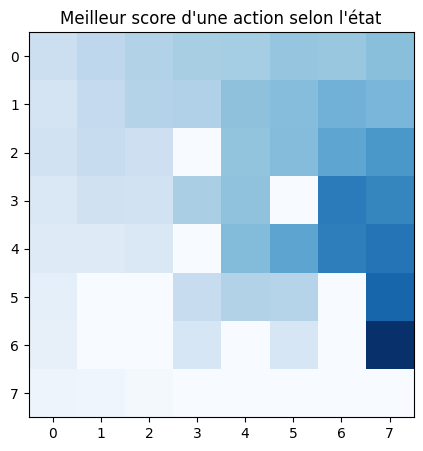

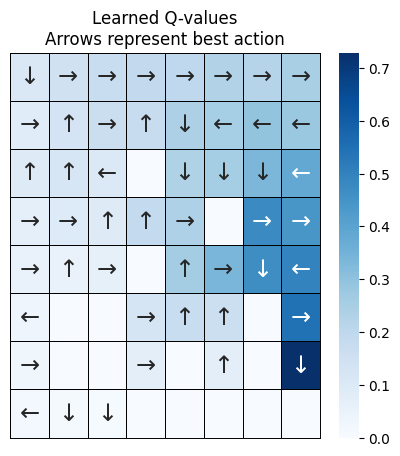

In [114]:
showBestValues(Q)
plot_q_values_map(Q,8)

---

## Double Q Learning

Codez maintenant l'algorithme de double Q-Learning et comparez les résultats (cf. [CLIFFDoubleQLearning](https://github.com/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/GymCLIFFDoubleQLearningTODO.ipynb))


In [128]:
import matplotlib.pyplot as plt

env_double = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True, render_mode='ansi')
actions = {0:'Gauche', 1:'Bas', 2:'Droite', 3:'Haut'}
directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}

In [129]:
QA = np.zeros([env_double.observation_space.n,env_double.action_space.n])
QB = np.zeros([env_double.observation_space.n,env_double.action_space.n])

In [130]:
# Paramètres pour le double q learning
lambda_learn = .3
gamma = 0.99
epsilon = 1.

In [131]:
##algorithme de Q-Learning double
def q_learn_double(nb_actions=100):
    """
    effectue un cycle d'apprentissage/recherche de solution' via le Q-Learning simple

    Parameters
    ----------
    epoch : no de l'etape

    Returns
    -------
    total_r : recompense totale
    r : recompense du dernier etat rencontre
    states_list : liste des etats traverses
    actions_list : liste des actions effectuees
    goal : but atteint

    """
    s = env_double.reset()
    #sous python 3.10, ajouter
    s = s[0]
    total_r = 0
    done = False
    step = 0
    states_list = []
    actions_list = []

    # The Q-Table learning algorithm
    while not done and step < nb_actions:
        step += 1
        # Choose an action by greedily (with noise) picking from Q table
        actionsA = QA[s, :]
        actionsB = QB[s, :]
        if rnd.random()<epsilon and (np.max(actionsA)==0 or np.max(actionsB)==0):
            # a = env_double.action_space.sample()
            a = rnd.randint(0, env.action_space.n-1)
        else:
            bestQa = np.argmax(actionsA)
            bestQb = np.argmax(actionsB)
            a = bestQa if QA[s, bestQa] > QB[s, bestQb] else bestQb

        # Get new state and reward from environment
        new_state, r, done, _, _ = env_double.step(a)


        # Q-Learning
        if (np.random.uniform(0.1) < 0.5):
            aeto= np.argmax(QA[new_state, :])
            QA[s, a] = QA[s, a] + lambda_learn*(r + gamma * QB[new_state,aeto] - QA[s, a])
        else:
            beto=np.argmax(QB[new_state,:])
            QB[s, a] = QB[s, a] + lambda_learn*(r + gamma * QA[new_state,beto] - QB[s, a])

        s = new_state
        total_r = total_r + r
        states_list.append(s)
        actions_list.append(a)

    return total_r, r, states_list, actions_list, done

In [132]:
def try_qlearn_double(nb_episodes = 3000, nb_actions = 100):
    """
    lance nb_episodes fois un cycle de Q-Learning et memorise chaque solution trouvee

    Returns
    -------
    solutions_list : liste des solutions (no, recompense totale, liste des etats, liste des actions)
    """
    global epsilon

    solutions_list = []
    epsilon = 1
    for i in range(nb_episodes):
        # Reset environment and get first new observation
        total_r, r, states_list, actions_list, done = q_learn_double(nb_actions)
        epsilon = epsilon * 0.9999
        # memorize if a solution has been found
        if r==1 : solutions_list.append((i, total_r, states_list, actions_list))

    if (len(solutions_list) == 0): print("aucune solution trouvee !!")
    return solutions_list

#### Affichage du résultat


In [65]:
def rendu_double(solutions_list):
    """ affiche la plus courte sequence d'actions permettant d'atteindre l'objectif q partir des solutions fournies
    Parameters
    ----------
    solutions_list : liste des solutions trouvees

    Returns
    -------
    None.
    """
    mini_sol = solutions_list[0]
    for s in  solutions_list:
        if len(s[2]) < len(mini_sol[2]): mini_sol = s
    print("une solution en ", len(mini_sol[2]), " etapes : ")
    env_double.reset()
    env_double.render()
    for i in range(0, len(mini_sol[2])):
        env_double.env.s = mini_sol[2][i]
        print("action ", actions[mini_sol[3][i]])
        env_double.render()

In [136]:
##ON LANCE LA RESOLUTION : 
solutions_double = try_qlearn_double()
if(len(solutions)>0):rendu_double(solutions_double)
#relancer le bloc si pas de solution trouvee

une solution en  23  etapes : 
action  Bas
action  Gauche
action  Droite
action  Droite
action  Gauche
action  Droite
action  Haut
action  Bas
action  Droite
action  Droite
action  Droite
action  Haut
action  Gauche
action  Droite
action  Droite
action  Haut
action  Bas
action  Gauche
action  Bas
action  Gauche
action  Bas
action  Gauche
action  Gauche


In [70]:
def plot_frequence_sol_double(solutions_list):
    """
    dessine la frequence de solution trouvees
    Parameters
    ----------
    solutions : liste des solutions

    Returns
    -------
    None.

    """
    xs = [x[0] for x in solutions_list]
    ys = [y[1] for y in solutions_list]
    plt.figure(figsize=(10, 4))
    plt.plot(xs, ys, '.')
    plt.show()


In [71]:
def showBestValues_double(Q):
    #bestQValues contient les meilleures valeurs des actions possibles pour chaque état
    #et on "dilate" les valeurs pour augmenter leurs différences (utile pour le choix des couleurs)
    bestQ = [max(ligne)**(1/10) for ligne in Q]
    dim = int(Q.shape[0]**(1/2))
    #on transforme bestQValues en matrice 4 x 12
    bestQValues = np.reshape(bestQ, (dim,dim))
    #on demande à python de générer une "heatmap" 
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(bestQValues,cmap='Blues')
    plt.title("Meilleur score d'une action selon l'état")
    plt.show()


In [72]:
# from Author: Andrea Pierré
# License: MIT License
from math import sqrt
sqrt_vect = np.vectorize(sqrt)

def plot_q_values_map(qtable, dim):
    """Plot the last frame of the simulation and the policy learned."""
    qtable_val_max, qtable_directions = qtable_directions_map(qtable, dim)
    # Plot the last frame
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    # Plot the policy
    sns.heatmap(
        sqrt_vect(sqrt_vect(sqrt_vect(qtable_val_max))),
        annot=qtable_directions,
        fmt="",
        cmap=sns.color_palette("Blues", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
        xticklabels=[],
        yticklabels=[],
        annot_kws={"fontsize": "xx-large"},
        ).set(title="Learned Q-values\nArrows represent best action")
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.7)
        spine.set_color("black")
    plt.show()

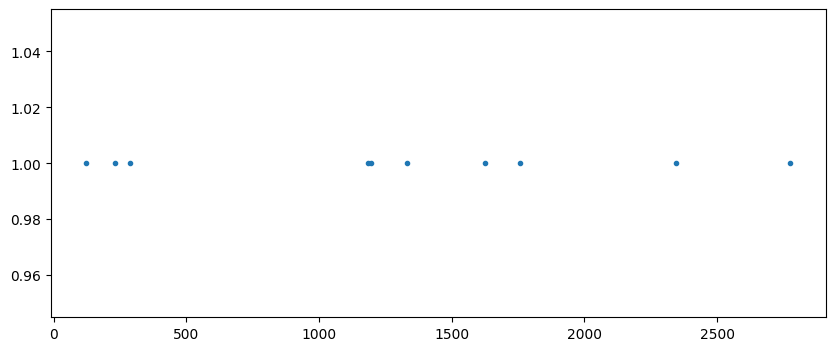

In [137]:
plot_frequence_sol_double(solutions_double)

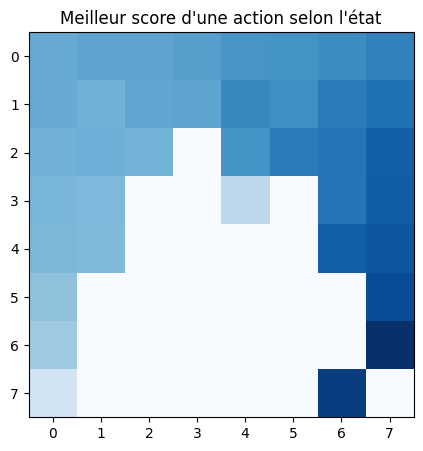

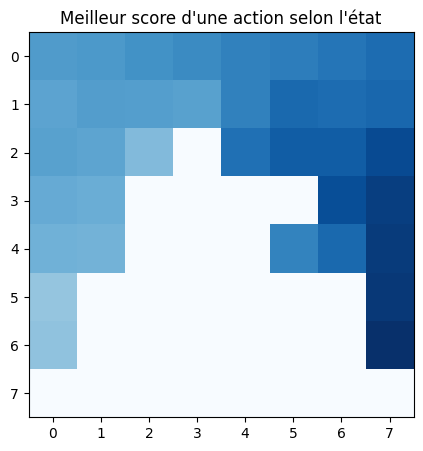

In [138]:
showBestValues_double(QA)
showBestValues_double(QB)

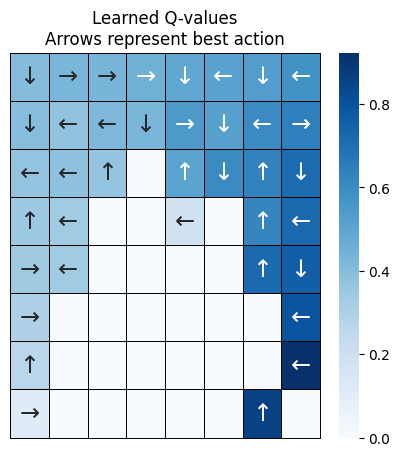

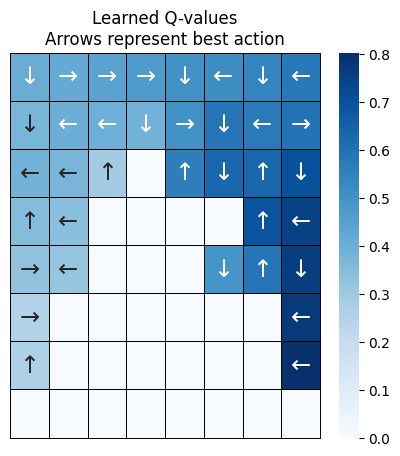

In [139]:
plot_q_values_map(QA,8)
plot_q_values_map(QB,8)

Les représentations ci-dessus sont très cohérentes avec le renforcement de l'apprentissage, en effet le départ se trouvant en hautà gauche et le but en bas à droite on observe que les combinaisons de cases avec le meilleur gain possible sont combiné avec des flèches qui vont nous amener vers le but. 

---

## Delayed QLearning

Pour le **Delayed QLearning**, le but est d'attendre avant de mettre à jour les valeurs de Qualité des actions.

- On introduit alors une liste qui contiendra les valeurs rencontrées.
- Cette liste $memory$ contient des tuples (etat, action, reward, nouvel_etat)
- L'algo suit le fonctionnement classique, mais après l'exécution d'une action, l'état actuel, l'action, le reward et le nouvel etat obtenu sont stockés dans la liste $memory$
- Périodiquement, au bout de $m$ itérations :
  - on balaie cette liste pour appliquer la classique formule de QLearning et mettre à jour la matrice Q pour chaque couple état, action rencontrés
  - on efface le contenue de cette liste.
- La performance du delayedQLearning dépend de la valeur m (par exemple pour m=50, ce n'est qu'après 50 actions (ou après avoir trouvé le but, ou au bout des actions demandées) que la matrice Q sera mise à jour avec l'ensemble des cas rencontrés

Le delayed QLearning permet une plus grande exploration et diminue les cas de maxima locaux.


In [87]:
##algorithme de Q-Learning simple
def delayed_q_learn(m,nb_actions=64):
    """
    effectue un cycle d'apprentissage/recherche de solution' via le delayed Q-Learning

    Parameters
    ----------
    epoch : no de l'etape
    m : nombre d'etapes avant de mettre a jour la Q-Table

    Returns
    -------
    total_r : recompense totale
    r : recompense du dernier etat rencontre
    states_list : liste des etats traverses
    actions_list : liste des actions effectuees

    """
    s = env.reset()
    s = s[0]
    total_r = 0
    done = False
    step = 0
    states_list = []
    actions_list = []
    memory = []
    
    # The Q-Table learning algorithm
    while not done and step < nb_actions:
        step += 1
        # Choose an action by greedily (with noise) picking from Q table
        actions = Q[s, :]
        if rnd.random()<epsilon or np.max(actions)==0:
            a = rnd.randint(0, env.action_space.n-1)
        else:
            a = np.argmax(actions)

        # Get new state and reward from environment
        new_state, r, done,_, _ = env.step(a)
        memory.append([s, a, r, new_state])

        # to privilegiate the shortest path, get negative reward every step
        # if r == 0: r = -0.001

        # delayed Q-Learning
        if(step%m == 0 or done or step == nb_actions):
            for _s, _a, _r, new_s in memory:
                Q[_s, _a] = (1-lambda_learn)*Q[_s, _a] + lambda_learn*(_r + gamma * np.max(Q[new_s, :]) - Q[_s, _a])
            memory.clear()
            
        s = new_state 
        total_r = total_r + r
        states_list.append(s) 
        actions_list.append(a)
        
        
    return total_r, r, states_list, actions_list

In [88]:
def try_delayed_qlearn(m,nb_episodes, nb_actions = 64):
    """
    lance nb_episodes fois un cycle de Q-Learning et memorise chaque solution trouvee

    Returns
    -------
    solutions_list : liste des solutions (no, recompense totale, liste des etats, liste des actions)
    """
    global epsilon
    states_list = []
    actions_list = []
    solutions_list = []
    epsilon = 1
    for i in tqdm(range(nb_episodes)):
        # Reset environment and get first new observation
        total_r, r, states_list, actions_list = delayed_q_learn(m, nb_actions)
        epsilon = epsilon * 0.999
        # memorize if a solution has been found
        if r == 1: 
            solutions_list.append((i, total_r, states_list, actions_list))
        

    if(len(solutions_list) == 0): print("aucune solution trouvee !!")
    return solutions_list

In [124]:
lambda_learn = .2
gamma = 0.8
epsilon = 1.

env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True, render_mode='ansi')
actions = {0:'Gauche', 1:'Bas', 2:'Droite', 3:'Haut'}
directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}

Q = np.zeros([env.observation_space.n,env.action_space.n])

env.reset()
solutions = try_delayed_qlearn(10,4000,60)
print("----------------------")
if(len(solutions)>0): rendu(solutions) 

100%|██████████| 4000/4000 [00:03<00:00, 1154.74it/s]

----------------------
une solution en  14  etapes : 

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF


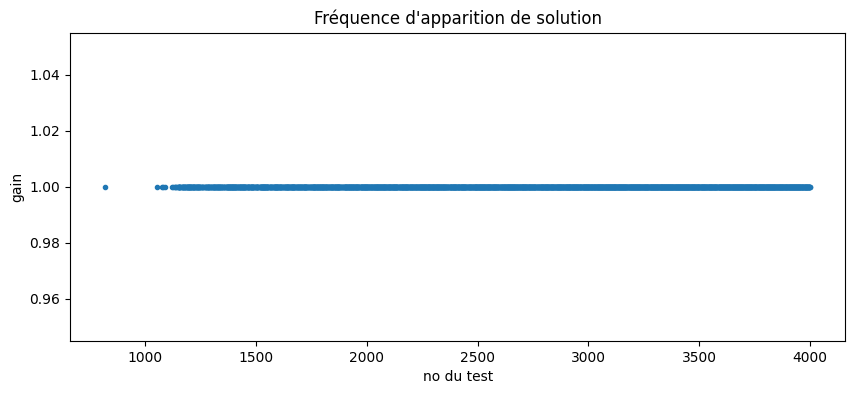

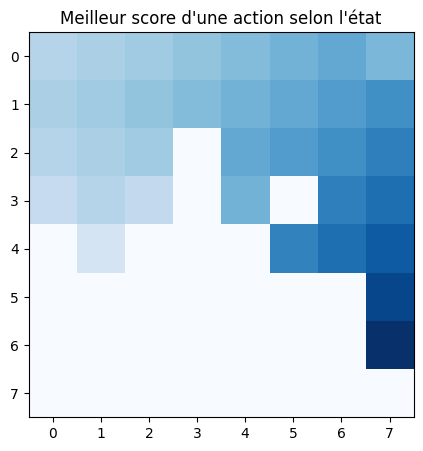

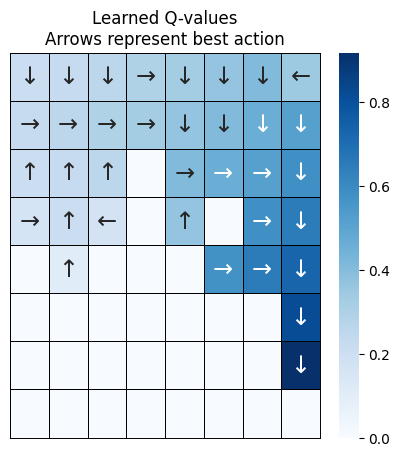

In [125]:
plot_frequence_sol(solutions)
showBestValues(Q)
plot_q_values_map(Q,8)

Dans ces trois représentations, on met en évidence que l'algorithme de delayed q-learning va explorer davantage de solutions que le double q-learning car on va mettre à jour la Q-table périodiquement. Encore une fois, on retrouve des solutions cohérentes, la plus courte en 14 étapes, dans le premier graphique, on voit que les premières itérations ne mènent pas tout de suite à une solution, mais au bout de 1100 cycles on rrive presque systématiquement à bout du problème. les deuxièmes et toisièmes graphiques vont mettre en évidence l'espérence de récompense pour chaque case exploré ainsi que la meilleure action à prendre en arrivant sur cette case. Les représentations sont cohérentes avec le problème ainsi que les représentations par les autres algorithmes, les actions mises en évidence sur les cases vont nous permettre d'arriver au but du plateau.